### Observable trends

In [1]:
%matplotlib notebook

In [2]:
# References
import pandas as pd
import matplotlib as plt

In [3]:
# Read data
city_data_df = pd.read_csv("resources/city_data.csv")
ride_data_df = pd.read_csv("resources/ride_data.csv")

In [4]:
ride_data_df = ride_data_df.groupby("city")["fare"].agg([("Avg Fare","mean"),("Total Fare","sum")]).\
                    join(\
                    ride_data_df.groupby("city")["ride_id"].agg([("Total Ride","count")])).\
                    reset_index()

In [5]:
city_ride_data_df = pd.merge(city_data_df,ride_data_df,on="city",how="left").fillna(0).\
                    rename(columns={"type":"City Type","city":"City","driver_count":"Driver Count"})

In [6]:
# Get totals and set pie chart parameters
total_rides = city_ride_data_df["Total Ride"].sum()
total_fares = city_ride_data_df["Total Fare"].sum()
total_drivers = city_ride_data_df["Driver Count"].sum()
# Gold, Sky Blue, Coral
colors = ["#FFD700","#76D7EA","#FF7F50"]
autopct="%1.1f%%"
explodes = (0,0,0.15)

<IPython.core.display.Javascript object>


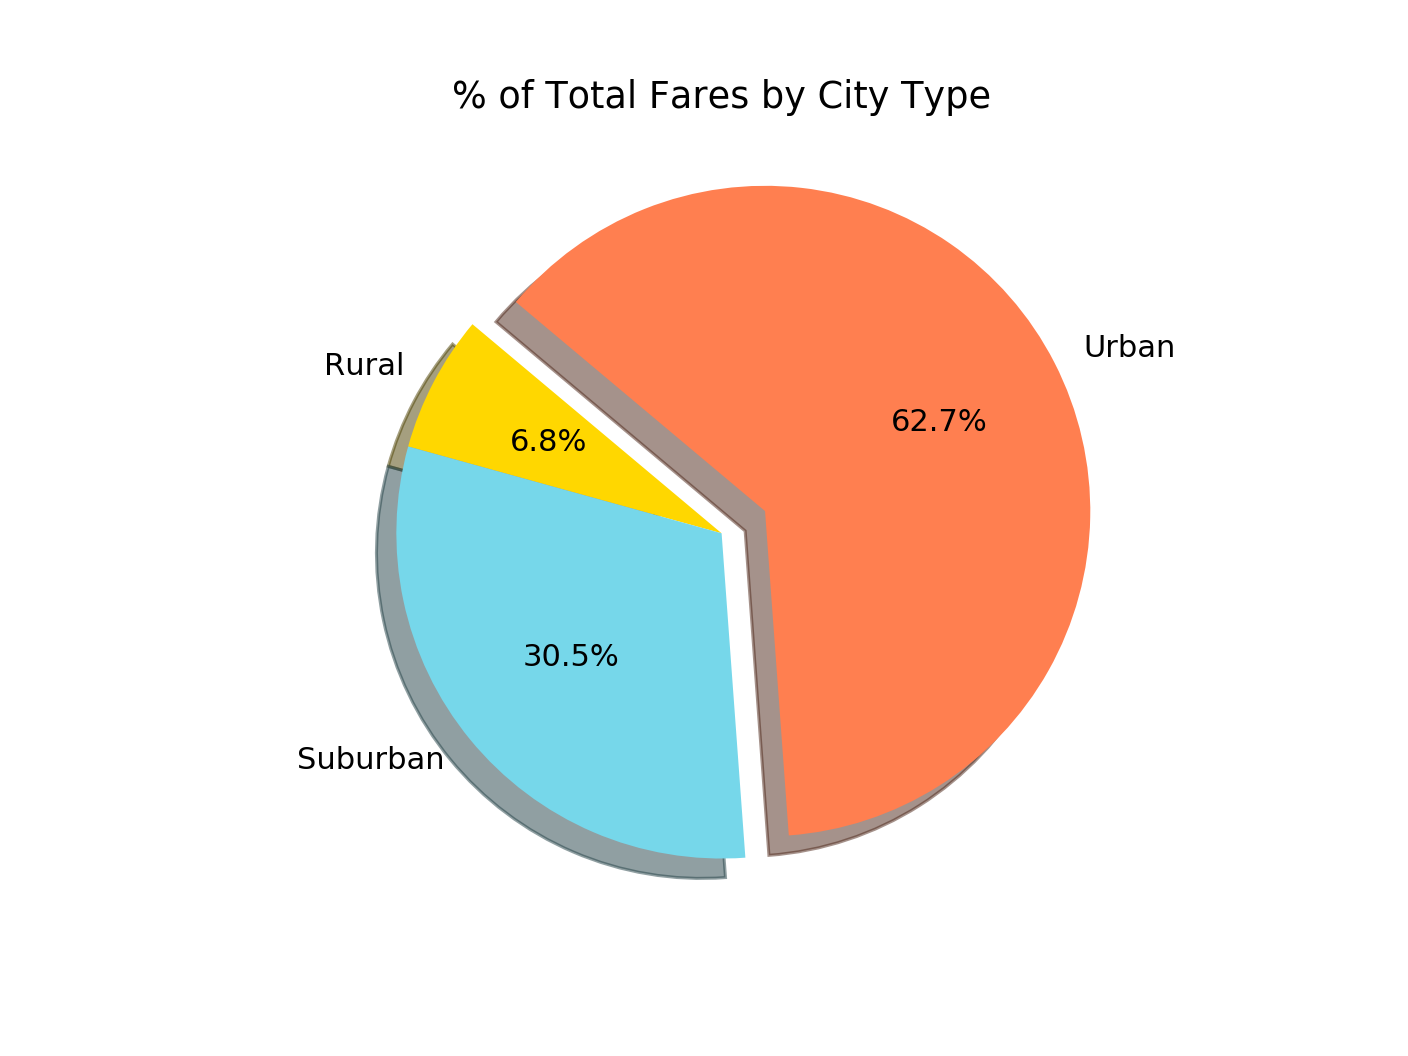

Text(0.5, 1.0, '% of Total Fares by City Type')

In [7]:
#% of Total Fares by City Type
fares_city_type = (city_ride_data_df.groupby("City Type")["Total Fare"].\
                                    agg([("% of Total Fare","sum")])/total_fares)

fares_plot = fares_city_type.plot.pie(["% of Total Fare"], \
                                      legend=False,\
                                     explode=explodes,\
                                     startangle=140,
                                     shadow=True,
                                     colors=colors,\
                                     autopct=autopct)
                                      
fares_plot.set_ylabel("")       
fares_plot.set_title("% of Total Fares by City Type", fontsize=12)


<IPython.core.display.Javascript object>


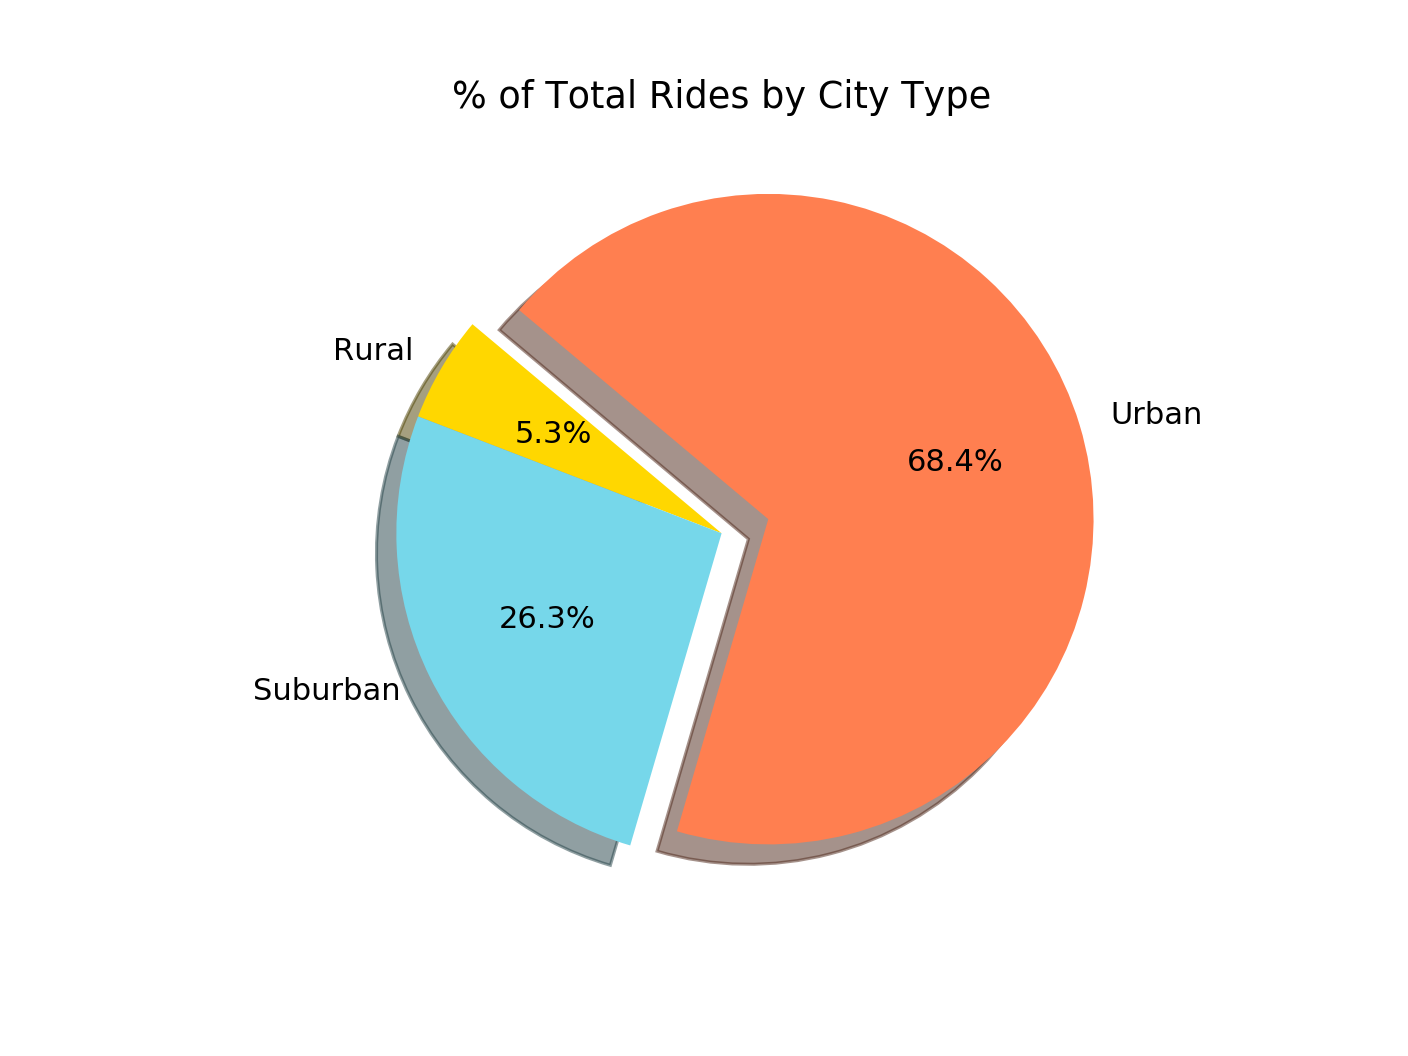

Text(0.5, 1.0, '% of Total Rides by City Type')

In [8]:
#% of Total Rides by City Type
rides_city_type = (city_ride_data_df.groupby("City Type")["Total Ride"].\
                                      agg([("% of Total Rides","sum")])/total_rides)

rides_plot = rides_city_type.plot.pie(["% of Total Rides"], \
                                      legend=False,\
                                     explode=explodes,\
                                     startangle=140,
                                     shadow=True,
                                     colors=colors,\
                                     autopct=autopct)
                                      
rides_plot.set_ylabel("")       
rides_plot.set_title("% of Total Rides by City Type", fontsize=12)


<IPython.core.display.Javascript object>


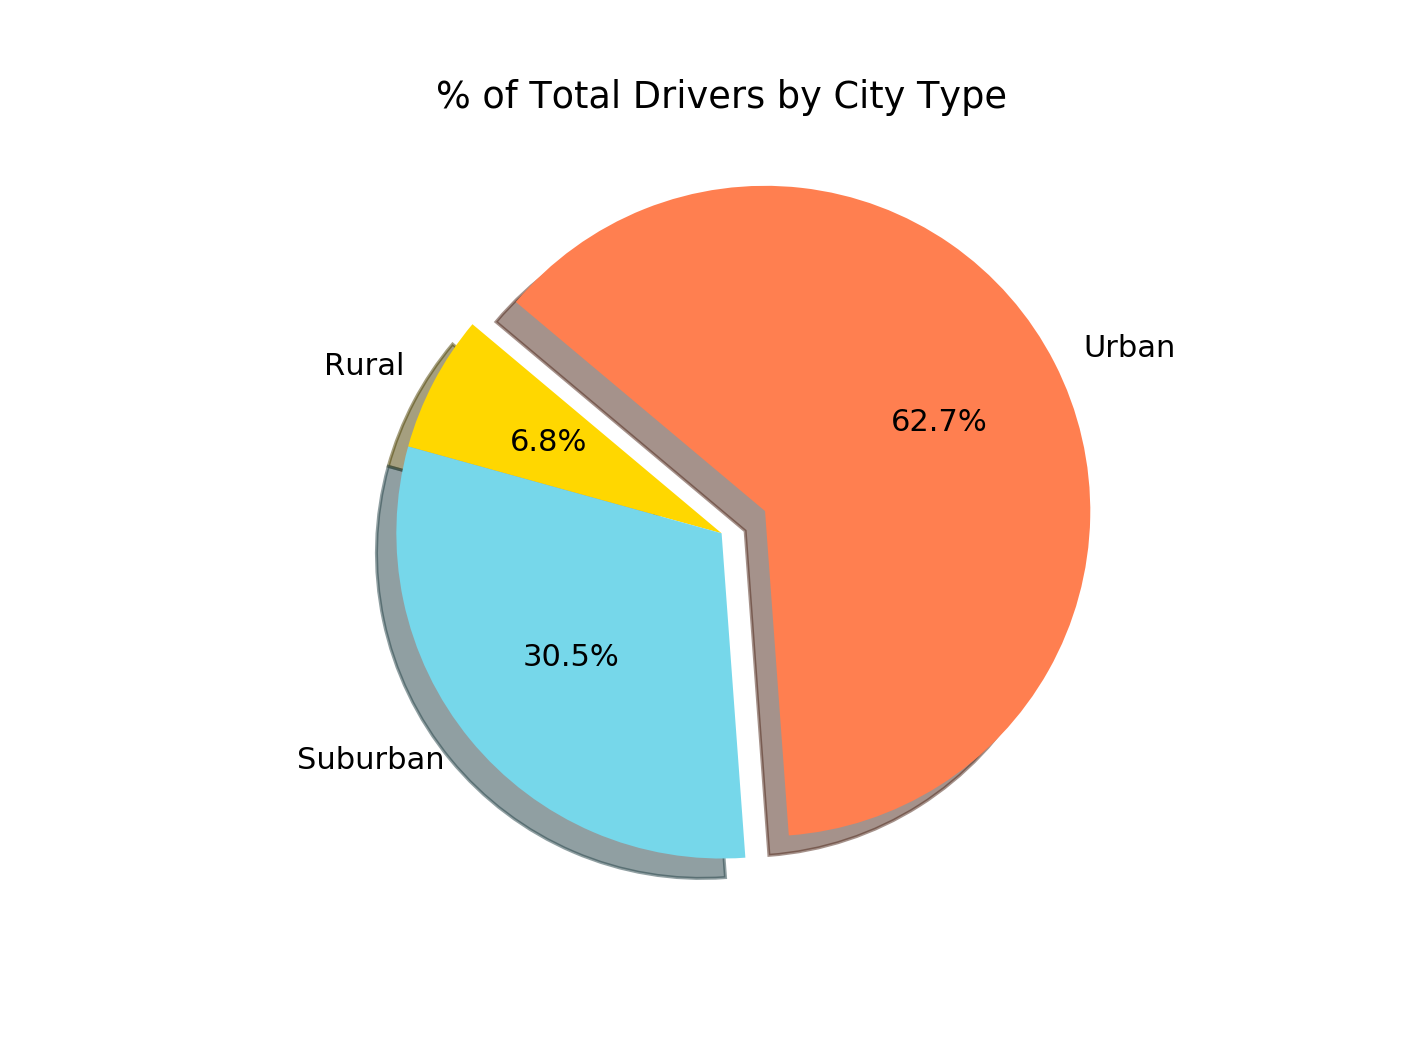

Text(0.5, 1.0, '% of Total Drivers by City Type')

In [9]:
#% of Total Drivers by City Type
drivers_city_type = (city_ride_data_df.groupby("City Type")["Driver Count"].\
                                      agg([("% of Total Drivers","sum")])/total_drivers)
drivers_plot = fares_city_type.plot.pie(["% of Total Fare"], \
                                      legend=False,\
                                     explode=explodes,\
                                     startangle=140,
                                     shadow=True,
                                     colors=colors,\
                                     autopct=autopct)
                                      
drivers_plot.set_ylabel("")       
drivers_plot.set_title("% of Total Drivers by City Type", fontsize=12)